## 데이터 전처리

In [8]:
import pandas as pd
import numpy as np

In [ ]:
csv_path = '/content/sample_data/mnist_test.csv'
titanic = pd.read_csv(csv_path)
print(type(titanic))
print(titanic.dtypes)
titanic.info

In [9]:
z = [['Jackson', 68, True, np.NaN, 'A'],
['Liam', 74, True, 1.1, 'A'],
['Emma', np.NaN, False, 0.89, 'C'],
['James', 78, np.NaN, 0.91, 'C'],
['Ava', 54, False, 0.73, 'C'],
['Henry', 69, True, np.NaN, 'C']]
df = pd.DataFrame(data= z, columns=['Name', 'Weight', 'Option', 'Rate', 'Type'])
df

,Name,Weight,Option,Rate,Type
0,Jackson,68.0,True,NaN,A
1,Liam,74.0,True,1.10,A
2,Emma,NaN,False,0.89,C
3,James,78.0,NaN,0.91,C
4,Ava,54.0,False,0.73,C
5,Henry,69.0,True,NaN,C


## 인덱싱(indexing)과 슬라이싱(slicing)

In [11]:
x = [['Jackson', 68, True, 0.82, 'A'], ['Liam', 74, True, 1.1, 'B'], ['Emma', 52, False, 0.89, 'C'],
 ['James', 78, True, 0.91, 'C'], ['Ava', 54, False, 0.73, 'B'], ['Henry', 69, True, 0.78, 'C']]
df = pd.DataFrame(x, columns=['Name', 'Weight', 'Option', 'Rate', 'Type'])
df.info()
x = df.select_dtypes(include=['number'])
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   Weight  6 non-null      int64  
 2   Option  6 non-null      bool   
 3   Rate    6 non-null      float64
 4   Type    6 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 326.0+ bytes


,Weight,Rate
0,68,0.82
1,74,1.10
2,52,0.89
3,78,0.91
4,54,0.73
5,69,0.78


# 크롤링

In [134]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

## 로또번호 크롤링

In [135]:
res = requests.get('https://dhlottery.co.kr/common.do?method=main')
soup = bs(res.content, 'html.parser')
result = soup.select( '.ball_645')
data = []
for num in result:
 data.append(int(num.text))
data



[12, 16, 21, 24, 41, 43, 15]

In [136]:
df = pd.Series(data)
df.dtypes

dtype('int64')

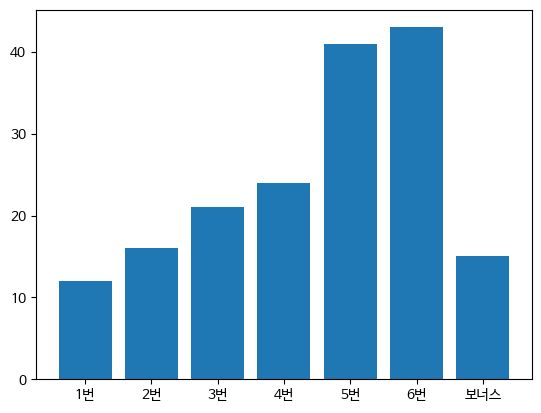

In [137]:
plt.rc('font', family='NanumBarunGothic')
plt.bar(['1번'
,'2번'
,'3번'
,'4번'
,'5번'
,'6번'
,
'보너스'], data)
plt.show()

## 날씨 크롤링

In [183]:
import newspaper as news

In [188]:
import requests
from bs4 import BeautifulSoup as bs

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8&oquery=%EB%82%A0%EC%94%A8&tqi=ihZbIwqVN8CssDDKWc0ssssstrG-048410'
res = requests.get(url)
soup = bs(res.content, 'html.parser')

result = soup.select(".temperature_text")
data = []

for info in result:
  data.append(info.text)


In [190]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
res = requests.get(url)
soup = bs(res.content, 'html.parser')

time = soup.select(".time>em")
temp = soup.select("span.num")

time_list = []
temp_list = []

for i in time:
  time_list.append(i.text)

for i in temp:
  temp_list.append(i.text)

cnt = 0
for date in time_list:
  if date == '내일':
    break

  else:
    cnt += 1
print(cnt)
time_list = time_list[:cnt]
temp_list = temp_list[:cnt]



0


In [187]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8&oquery=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8&tqi=ihZEesqVN8CssDKTKvVssssstAh-503840'
res = requests.get(url)
soup = bs(res.content, 'html.parser')

time = soup.select(".time>em")
temp = soup.select("span.num")
data = []

select_weather =['내일', '모레', '12.22.']

for i in range(len(time)):
  data.append((time[i].text, temp[i].text))

data


[]

In [174]:
print(time_list)
print(temp_list)

['15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']
['0°', '0°', '-1°', '-1°', '-1°', '-1°', '-1°', '-2°', '-2°']


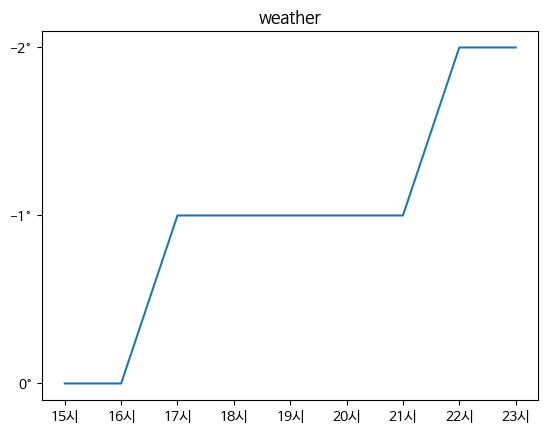

In [173]:
x = time_list
y = temp_list
plt.plot(x, y, '-')
plt.title('weather')
plt.show()

# 뉴스 수집하기

In [200]:
import newspaper as news
link = 'https://news.sktelecom.com/200489'
article = news.Article(link, language='ko')
article.download()
article.parse()
print(article.text)

SK텔레콤 뉴스룸에서 얼마 남지 않은 올해를 마무리하며, <2023년 독자들에게 가장 사랑받은 뉴스룸 콘텐츠 Top 10(조회수 Top 10*)>을 정리했다. 올 한 해 뉴스룸을 찾아준 분들을 위한 이벤트도 준비했으니 많은 참여를 부탁드린다.

*기간: ’23년 1월 1일 ~ 12월 15일 기준

1위: SKT의 AI는 어디에나 있다, AI to Everywhere

‘글로벌 AI 컴퍼니’로의 비전을 선포한 SK텔레콤은 고객 주변, 어디에나 위치한 자사의 AI 서비스를 알리는 새로운 캠페인 ‘SKT의 AI는 어디에나 있다(AI to Everywhere)’를 선보였다. ▲나만의 AI 개인비서, A.(에이닷) ▲에어택시, UAM ▲ 동물 의료 AI 서비스 엑스칼리버(X Caliber) ▲AI 반도체, 사피온(SAPEON) 총 5편의 캠페인으로 SKT가 AI 컴퍼니로서 고객의 일상을 어떻게 AI로 연결하는지 소개했다. [보러가기]

2위: [CES 2023 랜선투어] 2030 넷제로, 변화를 위한 ‘행동’으로

SKT를 비롯한 SK그룹 8개 계열사가 미국 라스베가스에서 열린 ‘CES 2023(세계 최대 IT · 가전 전시회)’에서 40여 개 탄소 감축 기술을 선보이고, 넷제로를 향한 의지를 다지는 전시를 진행했다. [보러가기]

3위: SKT 에릭 부사장, “한국어 거대언어모델 경험 바탕… 세계 최고 수준 다국어 LLM이 목표”

한글날을 맞이하여, SKT 자체 AI 언어모델 개발을 이끌었고, 현재는 글로벌 거대언어 모델(LLM)을 담당하는 에릭 데이비스(Eric Davis) 부사장으로부터 한국어 및 다국어 LLM 기술 경험과 AI가 가져올 미래에 대해서 이야기를 나눴다. 에릭 부사장은 “SKT Global LLM이 구축된다면, 전 세계 최초의 다국어 텔코 전문 LLM이 될 것”이라 예상했다. [보러가기]

4위: [MWC23 랜선투어] SKT가 제시하는 ICT 미래… MWC2023에서 선보인다

스페인 바르셀로나에서 열린 ‘MWC23’에서 SKT는 인공지능(AI)

In [9]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://news.kbs.co.kr/news/pc/view/view.do?ncd=7845104"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./webtoon")):
 os.makedirs(os.path.join("./webtoon"))
i = 1
for tag in soup.select('.wt_viewer img'):
 img_url = tag['src']
 save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : O")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

 with open(save_img, 'wb') as f:
  f.write(img_data)

## 영화 평가 크롤링

In [33]:
import requests
from bs4 import BeautifulSoup as bs

url = 'http://www.cine21.com/movie/info/?movie_id=58978'
res = requests.get(url)
soup = bs(res.content, 'html.parser')

result = soup.select('.comment')
data = []
for info in result:
  data.append(info.text)

data

['권력이 영원할 줄 아는 사악한 바보들에게',
 '검사의 봄에 되돌아보는, 뱀의 욕망이 낳은 탄식과 울분의 밤',
 '여러모로 아슬아슬하다',
 '‘어떻게 성공했지?’라는 궁금증과 하나회를 향한 분노가 왔다 갔다',
 '‘전두광 영화’가 되지 않았다는 점이 놀랍다',
 '바둑을 오셀로로 뒤집으려는 병법의 하룻밤']